In [21]:
import torch
from torch import nn, optim
import numpy as np

In [19]:
args = {
    'batch_size':20,
    'num_workers':40,
    'num_classes': 10,
    'lr': 1e-4,
    'weight_decay':5e-4,
    'num_epochs':30
}

if torch.cuda.is_available():
  args['device'] = torch.device('cuda')
else:
  args['device'] = torch.device('cuda')

print(args['device'])

cuda


In [4]:
from torchvision import datasets

In [8]:
from torchvision import transforms

In [ ]:
train_set = datasets.MNIST('./', 
                           train=True, 
                           transform=transforms.ToTensor(), 
                           download=True)

test_set = datasets.MNIST('./', 
                           train=False, 
                           transform=transforms.ToTensor(), 
                           download=False)

print(f'Amostras de treino: {len(train_set)}')
print(f'Amostras de treino: {len(test_set)}')

In [10]:
import matplotlib.pyplot as plt

In [11]:
from torch.utils.data import DataLoader

In [13]:
train_loader = DataLoader(train_set,
                          batch_size=args['batch_size'],
                          shuffle=True,
                          num_workers=args['num_workers'])

test_loader = DataLoader(test_set,
                          batch_size=args['batch_size'],
                          shuffle=True,
                          num_workers=args['num_workers'])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 40 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 40 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([20, 1, 28, 28]) torch.Size([20])


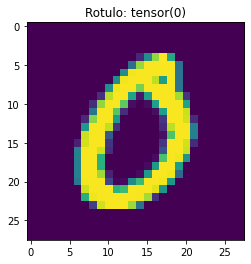

In [15]:
for batch in train_loader:
  dado,rotulo = batch
  print(dado.size(), rotulo.size())

  plt.imshow(dado[0][0])
  plt.title('Rotulo: ' + str(rotulo[0]))
  break

In [17]:
class MLP(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(MLP, self).__init__()

    self.features = nn.Sequential(nn.Linear(input_size, hidden_size),
                                  nn.ReLU(),
                                  nn.Linear(hidden_size, hidden_size),
                                  nn.ReLU()
                                  )
    self.out = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax()

  def forward(self, X):

    X = X.view(X.size(0), -1)

    feature = self.features(X)
    output = self.softmax(self.out(feature))

    return output

input_size = 28 * 28
hidden_size = 128
out_size = 10
net = MLP(input_size, hidden_size, out_size).to(args['device'])

In [18]:
criterion = nn.CrossEntropyLoss().to(args['device'])

In [20]:
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

In [22]:
for epoch in range(args['num_epochs']):

  epoch_loss = []
  for batch in train_loader:

    dado, rotulo = batch

    dado = dado.to(args['device'])
    rotulo = rotulo.to(args['device'])

    pred = net(dado)
    loss = criterion(pred, rotulo)
    epoch_loss.append(loss.cpu().data)

    loss.backward()
    optimizer.step()

  epoch_loss = np.asarray(epoch_loss)

  print(f'Epoca: {epoch}\n Loss: {epoch_loss.mean()} \n +/-: {epoch_loss.std()}')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 40 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoca: 0
 Loss: 1.7106051445007324 
 +/-: 0.15289469063282013
Epoca: 1
 Loss: 1.6603138446807861 
 +/-: 0.08976131677627563
Epoca: 2
 Loss: 1.6951370239257812 
 +/-: 0.09807014465332031
Epoca: 3
 Loss: 1.7589539289474487 
 +/-: 0.10509873926639557
Epoca: 4
 Loss: 1.8038749694824219 
 +/-: 0.10534440726041794
Epoca: 5
 Loss: 1.811769962310791 
 +/-: 0.10498470813035965
Epoca: 6
 Loss: 1.8278011083602905 
 +/-: 0.1079857274889946
Epoca: 7
 Loss: 1.8510537147521973 
 +/-: 0.10986389219760895
Epoca: 8
 Loss: 1.863141655921936 
 +/-: 0.1091671884059906
Epoca: 9
 Loss: 1.8870658874511719 
 +/-: 0.11249762773513794
Epoca: 10
 Loss: 1.9393996000289917 
 +/-: 0.11072138696908951
Epoca: 11
 Loss: 1.99326753616333 
 +/-: 0.11264149099588394
Epoca: 12
 Loss: 2.010066270828247 
 +/-: 0.11145934462547302
Epoca: 13
 Loss: 2.023183822631836 
 +/-: 0.10968226939439774
Epoca: 14
 Loss: 2.042417287826538 
 +/-: 0.11176160722970963
Epoca: 15
 Loss: 2.0846002101898193 
 +/-: 0.10749046504497528
Epoca: 16
 